In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-colorblind')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['TSLA', 'AAPL', 'IBM', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)


## Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple ##

In [4]:
company_list = [TSLA, AAPL, IBM, AMZN]
company_name = ['TESLA', 'APPLE', 'IBM', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2018-11-09,70.800003,69.045998,69.800003,70.101997,25494000.0,70.101997,TESLA
2018-11-12,69.956001,66.068001,69.674004,66.255997,34707500.0,66.255997,TESLA
2018-11-13,68.940002,66.440002,66.632004,67.746002,27243000.0,67.746002,TESLA
2018-11-14,69.421997,67.430000,68.540001,68.800003,25201500.0,68.800003,TESLA
2018-11-15,69.716003,67.807999,68.466003,69.688004,23128500.0,69.688004,TESLA
2018-11-16,71.139999,69.024002,69.038002,70.862000,36031000.0,70.862000,TESLA
2018-11-19,73.349998,70.575996,71.267998,70.694000,48544500.0,70.694000,TESLA
2018-11-20,69.959999,66.709999,68.349998,69.498001,40023500.0,69.498001,TESLA
2018-11-21,70.620003,67.480003,70.400002,67.638000,23434000.0,67.638000,TESLA


In [5]:
IBM.describe()

,High,Low,Open,Close,Volume,Adj Close
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000
mean,127.012810,124.723052,125.869041,125.868522,5.123529e+06,117.825808
std,9.902367,10.356048,10.152408,10.134427,3.171862e+06,10.964321
min,93.441681,86.577438,90.439774,90.602295,1.257397e+06,83.924706
25%,118.900574,116.673038,117.609940,117.748569,3.318174e+06,111.655701
50%,128.728485,126.912048,127.810707,127.954109,4.328557e+06,117.150818
75%,134.732307,132.997131,133.814529,133.833649,5.834797e+06,123.797501
max,151.768646,148.585083,149.923523,149.866150,3.981442e+07,142.981033


In [6]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2018-11-09 to 2021-11-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          755 non-null    float64
 1   Low           755 non-null    float64
 2   Open          755 non-null    float64
 3   Close         755 non-null    float64
 4   Volume        755 non-null    float64
 5   Adj Close     755 non-null    float64
 6   company_name  755 non-null    object 
dtypes: float64(6), object(1)
memory usage: 47.2+ KB


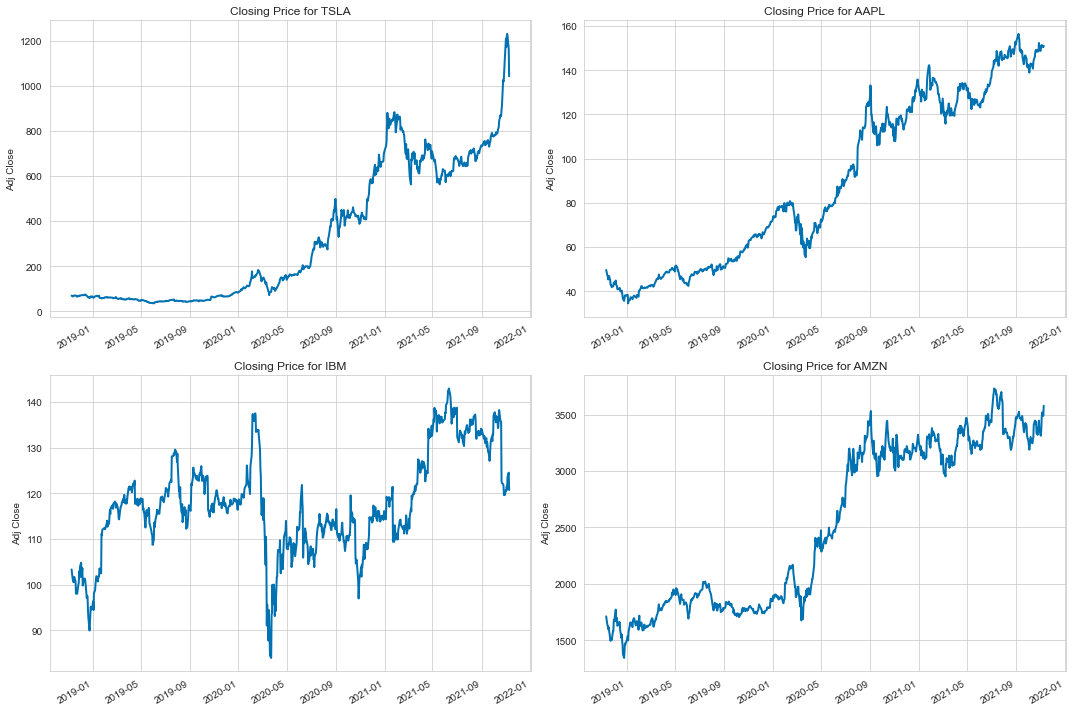

In [7]:
# the closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth=2)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price for {tech_list[i - 1]}")
    
plt.tight_layout()

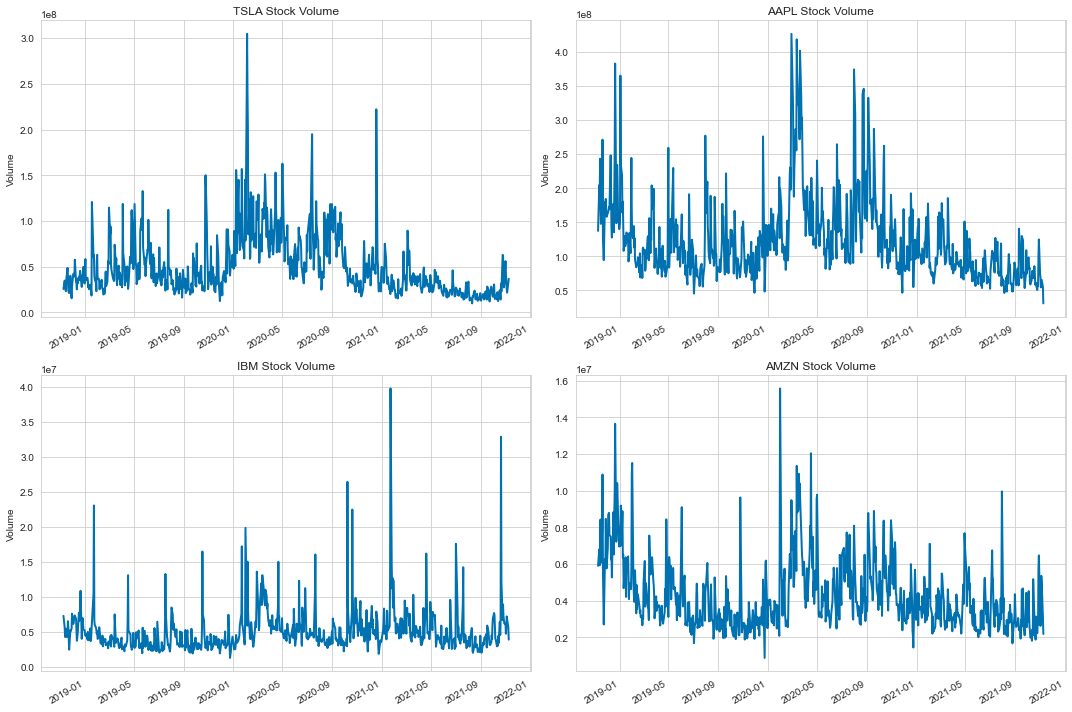

In [8]:
# the total volume

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(linewidth=2)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]} Stock Volume")
    
plt.tight_layout()

In [9]:
# Moving Average (MA) Stock

ma_day = [5, 22, 252]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

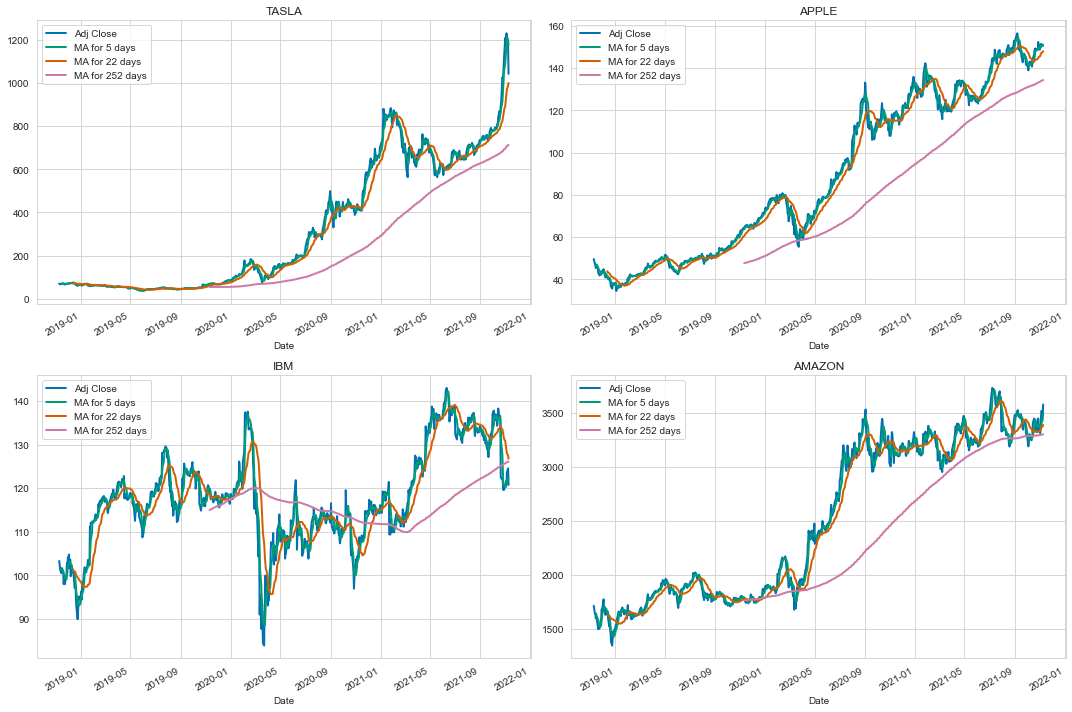

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, )
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 5 days', 'MA for 22 days', 'MA for 252 days']].plot(ax=axes[0,0], linewidth=2)
axes[0,0].set_title('TASLA')

AAPL[['Adj Close', 'MA for 5 days', 'MA for 22 days', 'MA for 252 days']].plot(ax=axes[0,1], linewidth=2)
axes[0,1].set_title('APPLE')

IBM[['Adj Close', 'MA for 5 days', 'MA for 22 days', 'MA for 252 days']].plot(ax=axes[1,0], linewidth=2)
axes[1,0].set_title('IBM')

AMZN[['Adj Close', 'MA for 5 days', 'MA for 22 days', 'MA for 252 days']].plot(ax=axes[1,1], linewidth=2)
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [11]:
# The percentage change for each day
# the daily return of the stock on average

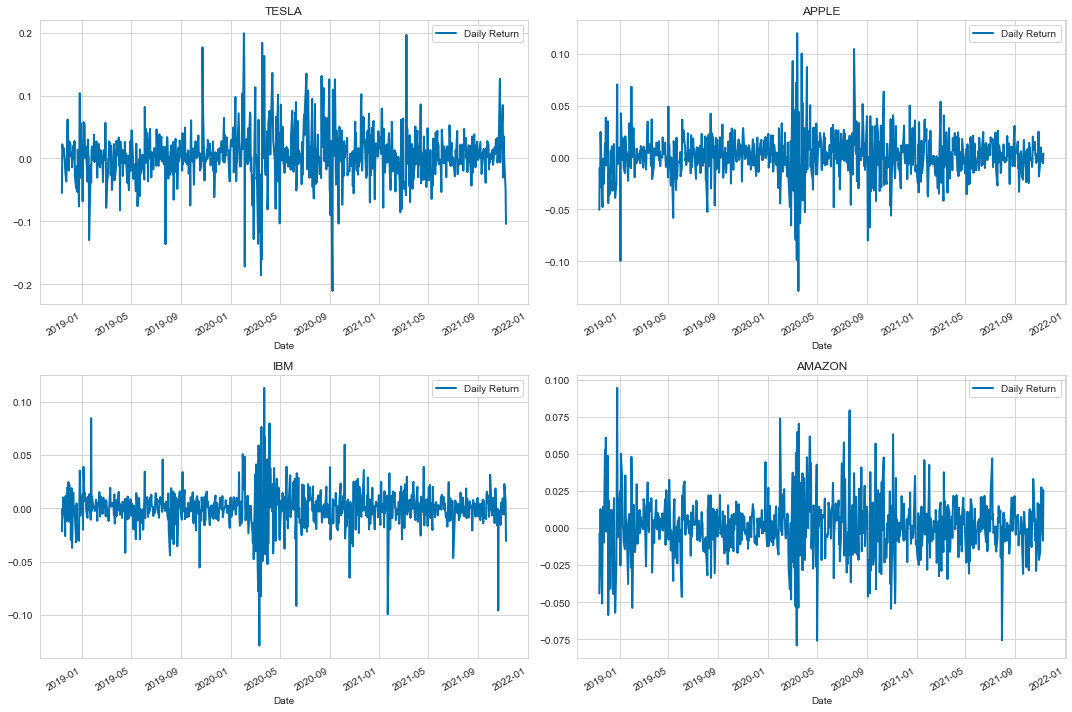

In [12]:
# use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0], legend=True, linewidth=2)
axes[0,0].set_title('TESLA')

AAPL['Daily Return'].plot(ax=axes[0,1], legend=True, linewidth=2)
axes[0,1].set_title('APPLE')

IBM['Daily Return'].plot(ax=axes[1,0], legend=True, linewidth=2)
axes[1,0].set_title('IBM')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linewidth=2)
axes[1,1].set_title('AMAZON')

fig.tight_layout()

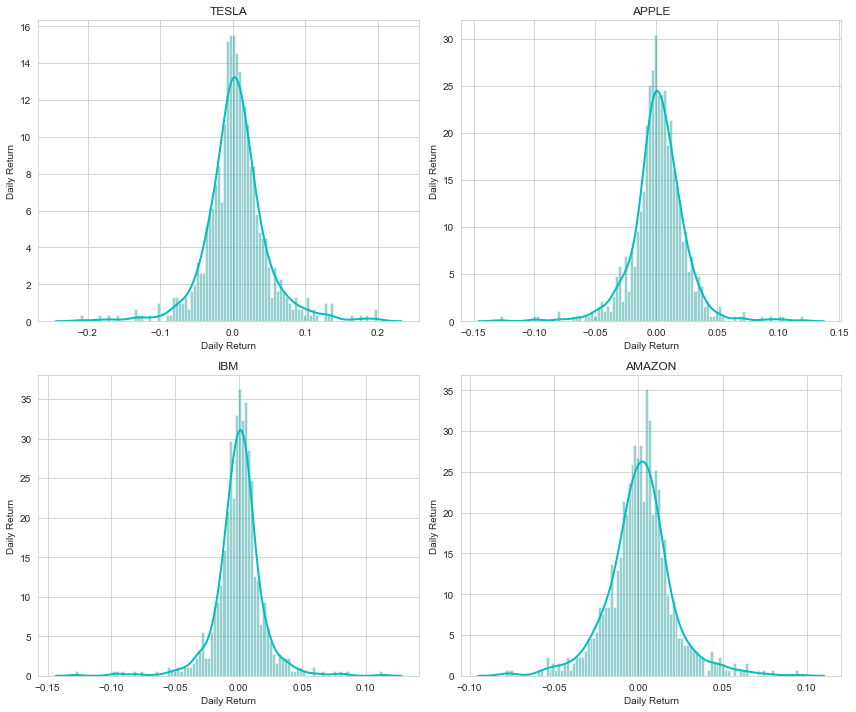

In [13]:
import warnings
warnings.filterwarnings('ignore')

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='darkcyan', kde_kws=dict(linewidth=2, color='c'))
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [14]:
# the correlation between different stocks closing prices

# the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head(10)

Symbols,TSLA,AAPL,IBM,AMZN
Date,,,,
2018-11-09,70.101997,49.623714,103.316383,1712.430054
2018-11-12,66.255997,47.123962,101.108559,1636.849976
2018-11-13,67.746002,46.653133,101.058372,1631.170044
2018-11-14,68.800003,45.335308,100.523140,1599.010010
2018-11-15,69.688004,46.454124,101.560150,1619.439941
2018-11-16,70.862000,46.968639,101.668884,1593.410034
2018-11-19,70.694000,45.107174,100.615128,1512.290039
2018-11-20,69.498001,42.952042,98.014252,1495.459961
2018-11-21,67.638000,42.903507,99.159981,1516.729980


In [15]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head(10)

Symbols,TSLA,AAPL,IBM,AMZN
Date,,,,
2018-11-09,NaN,NaN,NaN,NaN
2018-11-12,-0.054863,-0.050374,-0.021370,-0.044136
2018-11-13,0.022489,-0.009991,-0.000496,-0.003470
2018-11-14,0.015558,-0.028247,-0.005296,-0.019716
2018-11-15,0.012907,0.024679,0.010316,0.012777
2018-11-16,0.016846,0.011076,0.001071,-0.016073
2018-11-19,-0.002371,-0.039632,-0.010365,-0.050910
2018-11-20,-0.016918,-0.047778,-0.025850,-0.011129
2018-11-21,-0.026763,-0.001130,0.011689,0.014223


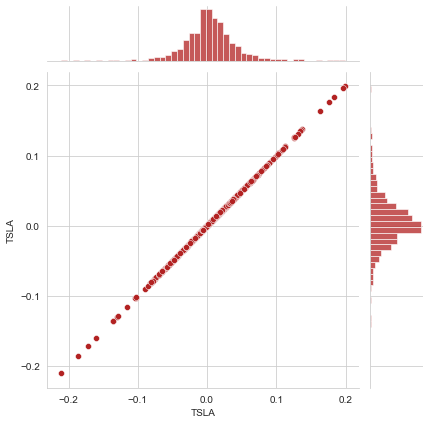

In [16]:
# Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.
# Comparing TESLA to itself should show a perfectly linear relationship
sns.jointplot('TSLA', 'TSLA', tech_rets, kind='scatter', color='firebrick')

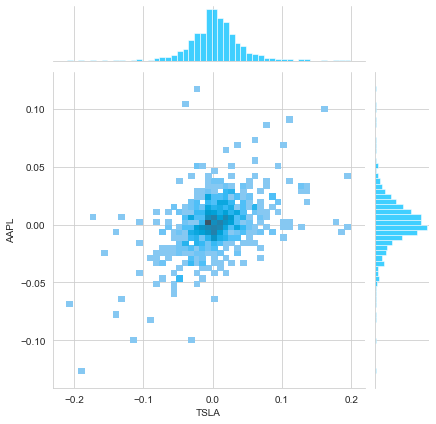

In [17]:
# use joinplot to compare the daily returns of TESLA and APPLE
sns.jointplot('TSLA', 'AAPL', tech_rets, kind='hist', color='deepskyblue')

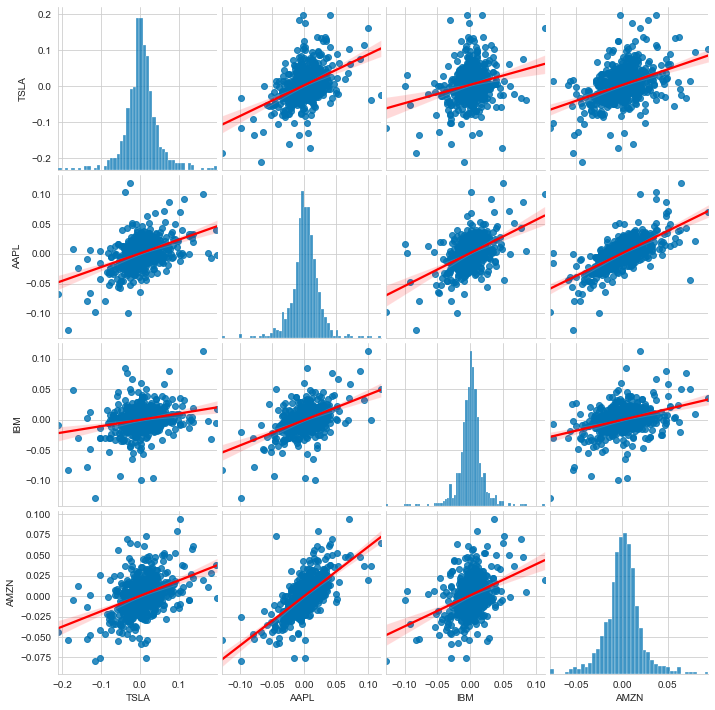

In [18]:
# pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets, kind='reg', plot_kws={'line_kws':{'color':'red'}})

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

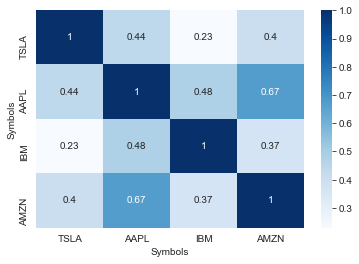

In [19]:
# The correlation between the stocks' daily return values
sns.heatmap(tech_rets.corr(), annot=True, cmap='Blues')

In [20]:
### Predicting the closing price stock price of IBM ###

In [21]:
# Get the stock quote
ibm_end=datetime.now()
ibm_start = datetime(end.year - 10, end.month, end.day)
df = DataReader('IBM', data_source='yahoo', start=ibm_start, end=ibm_end)

# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-11-09,177.093689,173.193115,176.099426,174.225616,5747561.0,123.325714
2011-11-10,176.644363,173.871887,175.506699,175.286804,4060154.0,124.076859
2011-11-11,179.569794,176.998093,177.122375,179.139572,3833904.0,126.804115
2011-11-14,181.491394,178.632889,180.850861,179.110901,6316376.0,126.783791
2011-11-15,181.615677,177.476105,179.244736,180.449326,4796224.0,127.731201
...,...,...,...,...,...,...
2021-11-03,121.692162,120.152962,120.678780,121.539200,5670784.0,121.539200
2021-11-04,123.339996,119.900002,123.050003,120.849998,7208700.0,120.849998
2021-11-05,123.769997,121.430000,121.430000,123.610001,6786500.0,123.610001


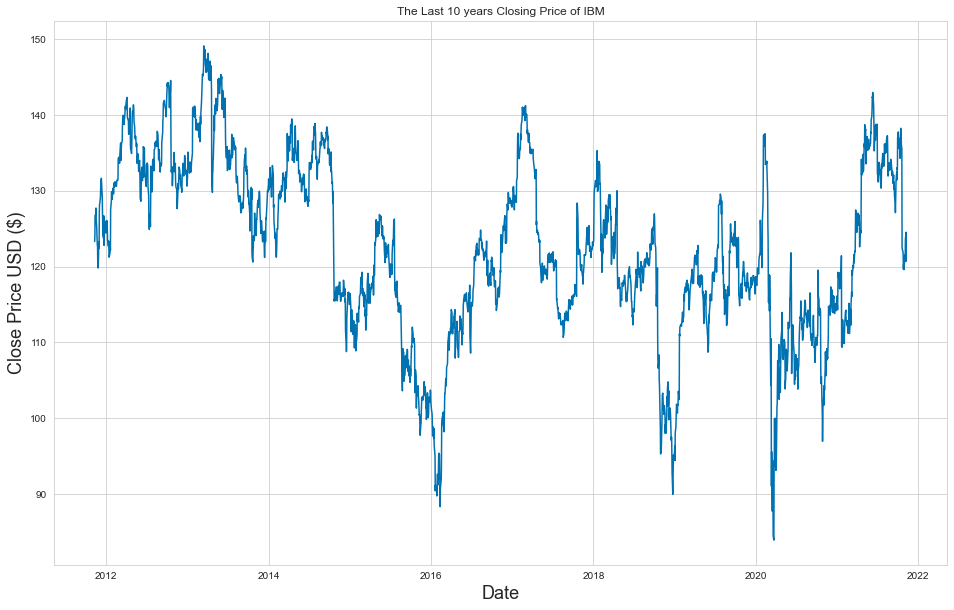

In [22]:
plt.figure(figsize=(16,10))
plt.title('The Last 10 years Closing Price of IBM')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [23]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Adj Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2392

In [24]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.60435309],
       [0.61587453],
       [0.6577066 ],
       ...,
       [0.60871362],
       [0.62297845],
       [0.56423191]])

In [25]:
# Create the training dataset

# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.60435309, 0.61587453, 0.6577066 , 0.65739485, 0.67192672,
       0.64981745, 0.64057903, 0.63549283, 0.59646523, 0.59470017,
       0.55982386, 0.55058473, 0.60404274, 0.59085933, 0.66414173,
       0.67919272, 0.6813724 , 0.69362032, 0.71541854, 0.72694044,
       0.70130081, 0.73223389, 0.70752974, 0.69683823, 0.67161532,
       0.65874413, 0.6181586 , 0.6111002 , 0.65625282, 0.59636073,
       0.60227733, 0.63040699, 0.6324824 , 0.62251831, 0.64525026,
       0.62137663, 0.64649621, 0.63860718, 0.62947267, 0.60746732,
       0.59760598, 0.59470017, 0.60518384, 0.58681114, 0.57238365,
       0.58110191, 0.59220873, 0.58650021, 0.66953956, 0.68469376,
       0.7049351 , 0.70285839, 0.69507328, 0.68967639, 0.71085134,
       0.7118891 , 0.7120967 , 0.70078286, 0.7226843 , 0.71417317])]
[0.7196742157020841]

[array([0.60435309, 0.61587453, 0.6577066 , 0.65739485, 0.67192672,
       0.64981745, 0.64057903, 0.63549283, 0.59646523, 0.59470017,
       0.55982386, 0.55058473, 0.604

(2332, 60, 1)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 48s 20ms/step - loss: 0.0027


In [32]:
# Create the testing data set

# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.283093885101684

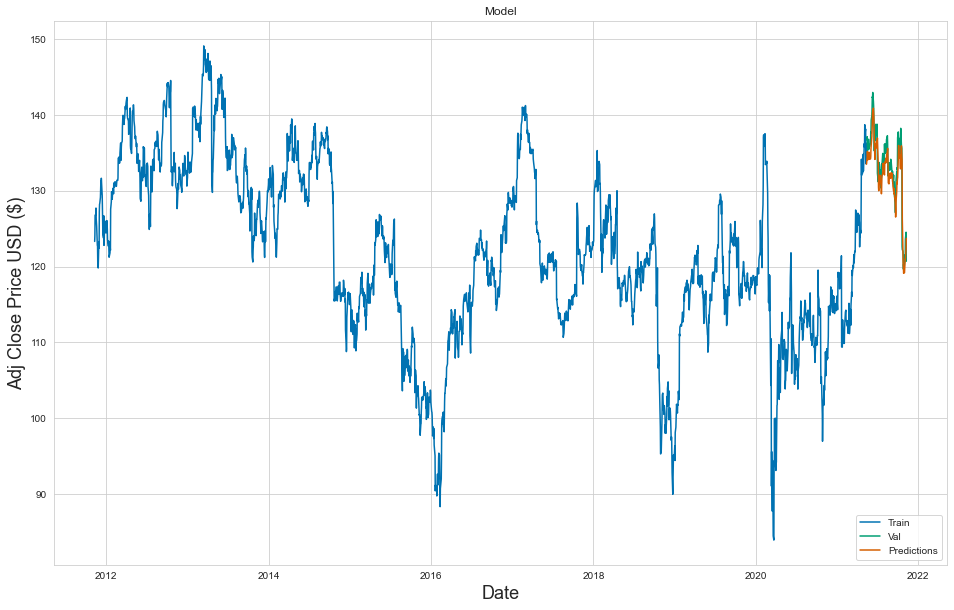

In [33]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [35]:
print(f'The root mean squared error: {rmse}')
# Show the valid and predicted prices
valid

The root mean squared error: 2.283093885101684


,Adj Close,Predictions
Date,,
2021-05-14,136.743103,133.520096
2021-05-17,137.149506,134.438828
2021-05-18,136.015350,135.195145
2021-05-19,135.334839,134.819138
2021-05-20,135.986984,134.097641
...,...,...
2021-11-03,121.539200,120.290474
2021-11-04,120.849998,120.985771
2021-11-05,123.610001,120.955498
